In [16]:
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import requests
from io import BytesIO



In [5]:
df = pd.read_csv("./mel_spectrograms/0.csv", header=None)

    

In [6]:
df = df.drop(df.columns[0], axis=1)
df.head()


,1,2,3,4,5,6,7,8,9,10,...,55159,55160,55161,55162,55163,55164,55165,55166,55167,55168
0,-25.497036,-14.607128,-8.115421,-3.814495,-2.237602,-1.635937,-1.829449,-2.138485,-2.681622,-3.191748,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-72.20578


In [19]:
reshaped_array = df.iloc[0].values.reshape(128, 431)


In [36]:
reshaped_array.shape

(128, 431)

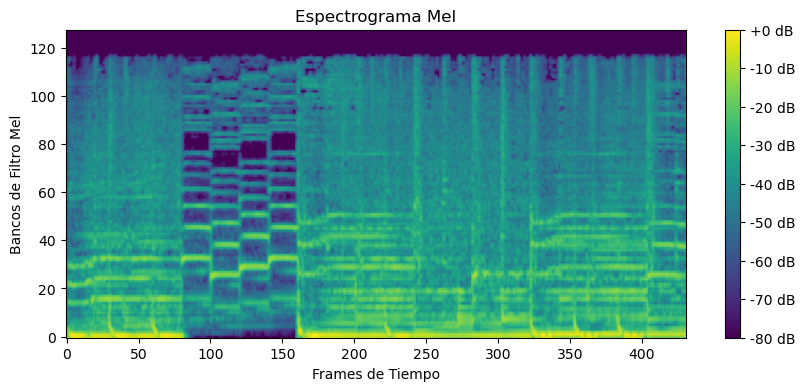

In [37]:
plt.figure(figsize=(10, 4))
plt.imshow(reshaped_array, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma Mel')
plt.xlabel('Frames de Tiempo')
plt.ylabel('Bancos de Filtro Mel')
plt.show()

In [35]:
sr = 22050  # Frecuencia de muestreo común, ajústala si es diferente

# Reconstrucción de la señal de audio desde el espectrograma Mel
audio = librosa.feature.inverse.mel_to_audio(librosa.db_to_amplitude(reshaped_array), sr=sr, n_fft=2048, hop_length=512)

# Reproducir el audio
ipd.Audio(audio, rate=sr)

In [14]:
client_id = "5e014985ad3b448a9a1941678627bcb4"
client_secret = "45bfe7fe93c14e578a40ac0dad5f63df"
spotify = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret), requests_timeout=10, retries=3)
spotify.trace = True

uri = "spotify:track:11BPfwVbB7vok7KfjBeW4k"


In [32]:
track_id = uri.split(":")[-1]
track_info = spotify.track(track_id)

preview_url = track_info['preview_url']
audio_content = requests.get(preview_url).content
y, sr = librosa.load(BytesIO(audio_content), sr=None, duration=5.0)

mel_spect = librosa.feature.melspectrogram(y=y, sr=sr)
mel_spect_db = librosa.power_to_db(mel_spect, ref=np.max)

In [18]:
mel_spect_db.shape

(128, 431)

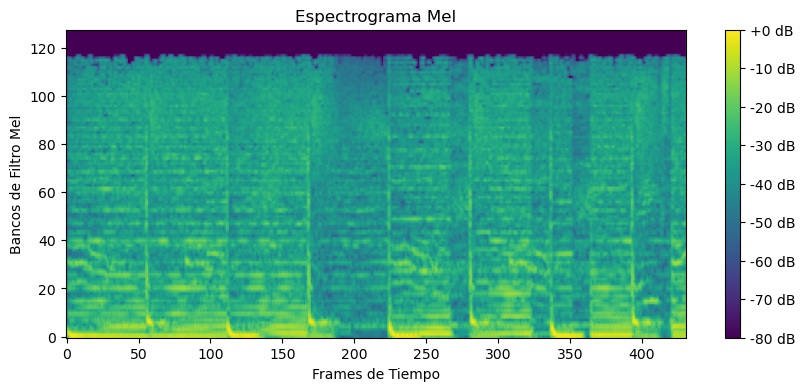

In [22]:
plt.figure(figsize=(10, 4))
plt.imshow(mel_spect_db, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma Mel')
plt.xlabel('Frames de Tiempo')
plt.ylabel('Bancos de Filtro Mel')
plt.show()

In [33]:
audio = librosa.feature.inverse.mel_to_audio(mel_spect, sr=sr, n_fft=2048, hop_length=512)

# Reproducir el audio
ipd.Audio(data=audio*10, rate=sr)

In [34]:
ipd.Audio(data=y, rate=sr)